# Solar Power Generation – Exploratory Data Analysis

## Introduction

This project focuses on analyzing and understanding data collected from a solar power plant.  
The dataset consists of power generation data from multiple inverters (source keys) and corresponding weather sensor data recorded at regular time intervals.

The main objective of this exploratory data analysis (EDA) is to study the relationship between environmental conditions such as ambient temperature, module temperature, and solar irradiation with the power generated by the plant.

Through this analysis, we aim to:
- Understand the structure and quality of the dataset.
- Identify missing values and inconsistencies.
- Visualize important patterns and trends in power generation.
- Prepare the data for building a regression model to predict power output using weather parameters.

## Dataset Overview

The dataset used in this project consists of two separate CSV files collected from a solar power plant:

- **Generation Data File**:  
  This file contains power generation data for individual inverters, identified by a unique `SOURCE_KEY`, recorded at different timestamps.  
  Key columns include:
  - `DATE_TIME`
  - `PLANT_ID`
  - `SOURCE_KEY`
  - `AC_POWER`
  - `DC_POWER`
  - `DAILY_YIELD`
  - `TOTAL_YIELD`

- **Weather Sensor Data File**:  
  This file contains environmental measurements recorded at the same timestamps as the generation data.  
  Key columns include:
  - `DATE_TIME`
  - `PLANT_ID`
  - `SOURCE_KEY`
  - `AMBIENT_TEMPERATURE`
  - `MODULE_TEMPERATURE`
  - `IRRADIATION`

Both files share a common `DATE_TIME` column, which allows them to be aligned based on time during preprocessing.

# Solar Power Generation – Data Preprocessing

This notebook focuses on combining and preparing solar power generation data and weather sensor data for further exploratory data analysis and modeling.

## Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Loading the Datasets

The generation and weather datasets are loaded from CSV files.

In [4]:
df1 = pd.read_csv("Plant_1_Generation_Data.csv")
df2 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

## Converting DATE_TIME Column to Datetime Format

The `DATE_TIME` column in both datasets is converted to datetime format to enable proper time-based operations and merging.

In [5]:
df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'], dayfirst=True, errors='coerce')
df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'], dayfirst=True, errors='coerce')

C:\Users\SHIVAJI\AppData\Local\Temp\ipykernel_13996\3440417786.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'], dayfirst=True, errors='coerce')


## Creating Complete Timestamp–Source Key Combinations

To handle missing inverter records at certain timestamps, all possible combinations of timestamps and source keys are generated.

In [6]:
timestamps = df2['DATE_TIME'].unique()
source_keys = df1['SOURCE_KEY'].unique()

all_combinations = pd.DataFrame(
    list(itertools.product(timestamps, source_keys)),
    columns=['DATE_TIME', 'SOURCE_KEY']
)

## Merging Power Generation Data

Power generation columns are merged with the complete timestamp–source key combinations.

In [7]:
power_cols = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

full_df = pd.merge(
    all_combinations,
    df1[['DATE_TIME', 'SOURCE_KEY'] + power_cols],
    on=['DATE_TIME', 'SOURCE_KEY'],
    how='left'
)

## Merging Weather Sensor Data

Weather parameters are merged based on timestamp. These values are common for all source keys at the same timestamp.

In [8]:
weather_cols = ['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
full_df = pd.merge(full_df, df2[weather_cols], on='DATE_TIME', how='left')

## Propagating Weather Data for Each Timestamp

Weather values are propagated across all source keys for the same timestamp.

In [9]:
weather_only_cols = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
full_df[weather_only_cols] = full_df.groupby('DATE_TIME')[weather_only_cols].transform('first')

## Missing Value Analysis and Source Key Distribution

The number of missing values in each column and the distribution of rows across source keys are analyzed.

In [10]:
print("\nNumber of missing values per column:")
print(full_df.isnull().sum())

print("\nNumber of rows per SOURCE_KEY:")
print(full_df['SOURCE_KEY'].value_counts())


Number of missing values per column:
DATE_TIME                 0
SOURCE_KEY                0
AC_POWER               1230
DC_POWER               1230
DAILY_YIELD            1230
TOTAL_YIELD            1230
AMBIENT_TEMPERATURE       0
MODULE_TEMPERATURE        0
IRRADIATION               0
dtype: int64

Number of rows per SOURCE_KEY:
SOURCE_KEY
1BY6WEcLGh8j5v7    3182
1IF53ai7Xc0U56Y    3182
zVJPv84UY57bAof    3182
zBIq5rxdHJRwDNY    3182
z9Y9gH1T5YWrNuG    3182
wCURE6d3bPkepu2    3182
uHbuxQJl8lW7ozc    3182
sjndEbLyjtCKgGv    3182
rGa61gmuvPhdLxV    3182
pkci93gMrogZuBj    3182
ih0vzX44oOqAx2f    3182
iCRJl6heRkivqQ3    3182
bvBOhCH3iADSZry    3182
adLQvlD726eNBSB    3182
ZoEaEvLYb1n2sOq    3182
ZnxXDlPa8U1GXgE    3182
WRmjgnKYAwPKWDb    3182
VHMLBKoKgIrUVDU    3182
McdE0feGgRqW7Ca    3182
7JYdWkrLSPkdwr4    3182
3PZuoBAID5Wc2HD    3182
YxYtjZvoooNbGkE    3182
Name: count, dtype: int64


# Data Visualization 
generating graphs to understand the data

## Date-time vs AC power generated

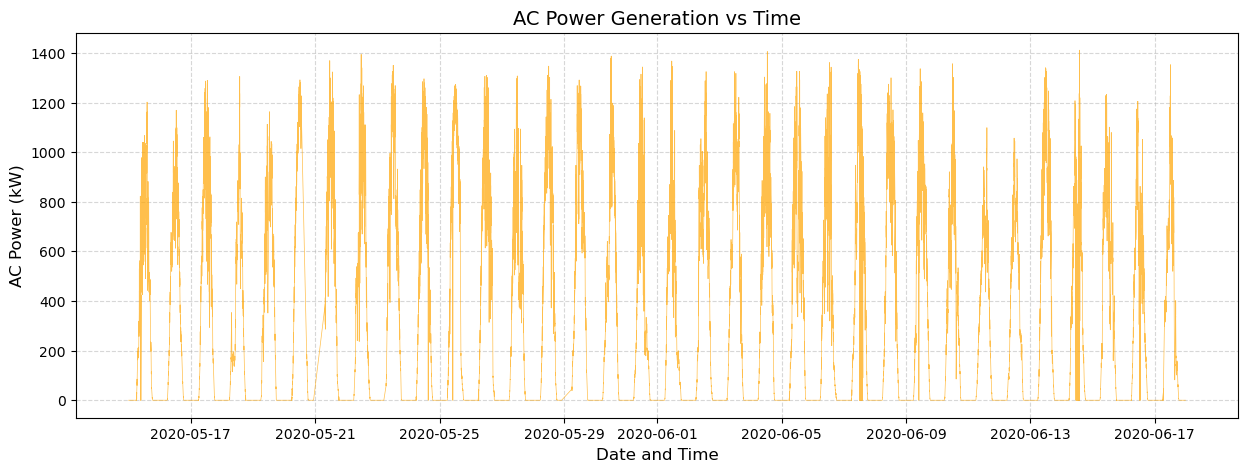

In [13]:
plt.figure(figsize=(15, 5))

plt.plot(df1['DATE_TIME'], df1['AC_POWER'], color='orange', alpha=0.7, linewidth=0.5)

plt.title('AC Power Generation vs Time', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('AC Power (kW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## Efficiency DC power vs AC power

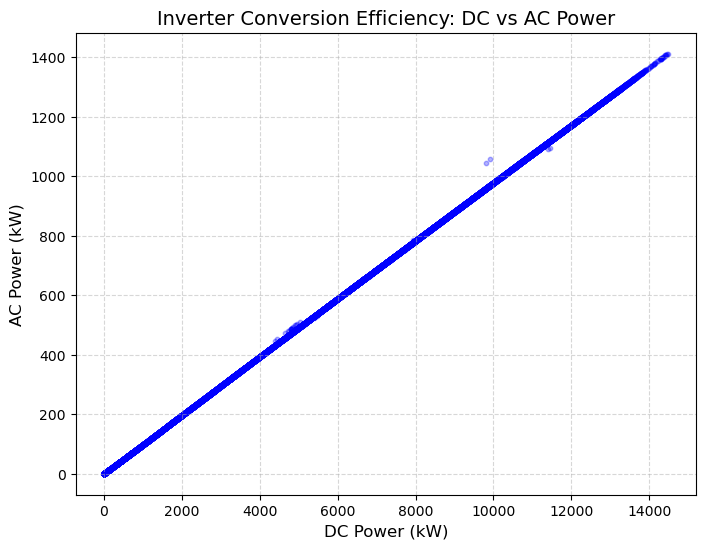

In [14]:
plt.figure(figsize=(8, 6))

plt.scatter(df1['DC_POWER'], df1['AC_POWER'], color='blue', alpha=0.3, s=10)

plt.title('Inverter Conversion Efficiency: DC vs AC Power', fontsize=14)
plt.xlabel('DC Power (kW)', fontsize=12)
plt.ylabel('AC Power (kW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## Total daily yield 

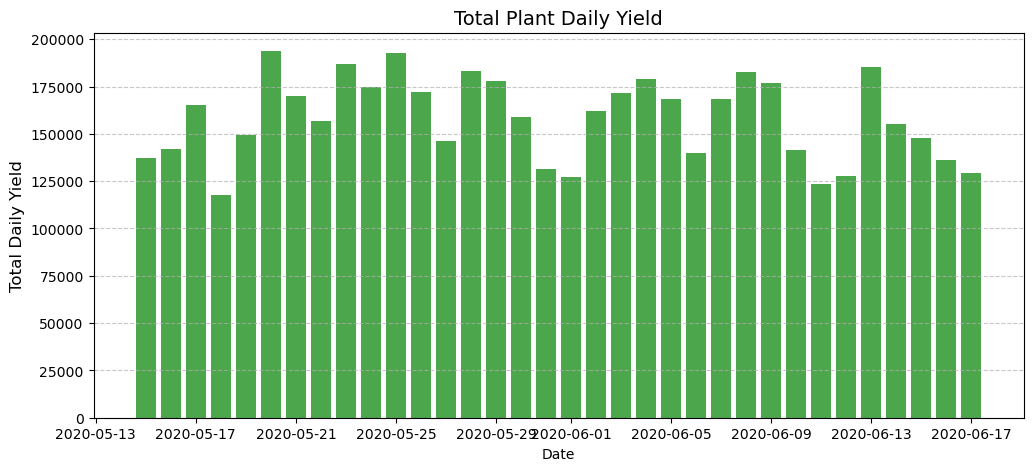

In [15]:
df1['DATE'] = df1['DATE_TIME'].dt.date

daily_plant_yield = df1.groupby(['DATE', 'SOURCE_KEY'])['DAILY_YIELD'].max().groupby('DATE').sum()

plt.figure(figsize=(12, 5))

plt.bar(daily_plant_yield.index, daily_plant_yield.values, color='green', alpha=0.7)

plt.title('Total Plant Daily Yield', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Total Daily Yield', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Power generated per inverter

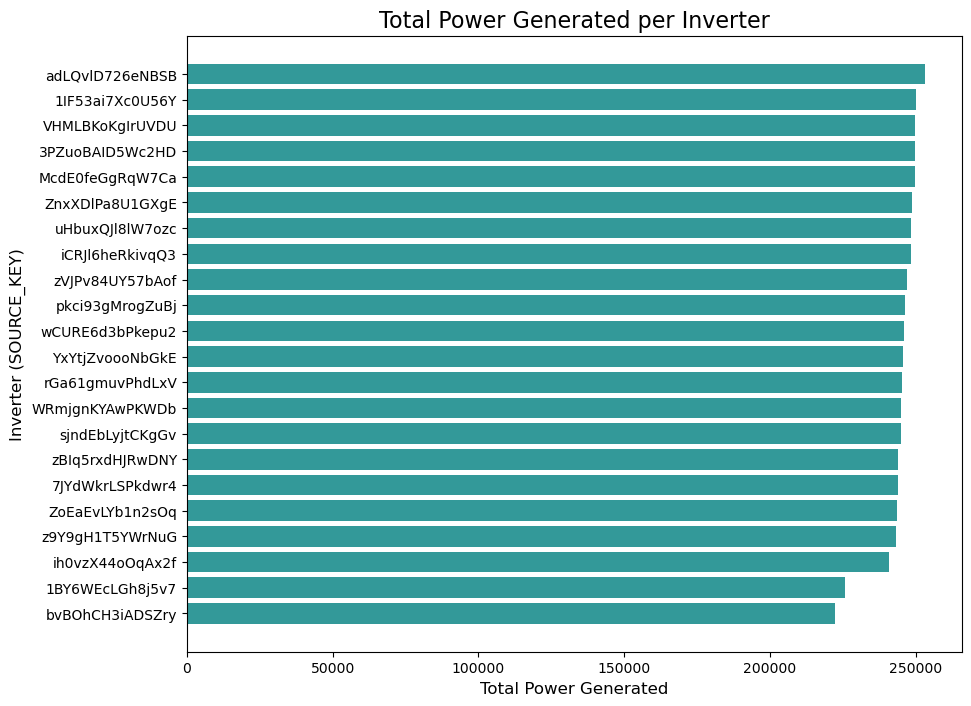

In [16]:
total_power_per_inverter = df1.groupby('SOURCE_KEY')['TOTAL_YIELD'].max() - df1.groupby('SOURCE_KEY')['TOTAL_YIELD'].min()

total_power_per_inverter = total_power_per_inverter.sort_values(ascending=True)

plt.figure(figsize=(10, 8))

plt.barh(total_power_per_inverter.index, total_power_per_inverter.values, color='teal', alpha=0.8)

plt.title('Total Power Generated per Inverter', fontsize=16)
plt.ylabel('Inverter (SOURCE_KEY)', fontsize=12)
plt.xlabel('Total Power Generated', fontsize=12)
plt.show()